In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [29]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [25]:
X = torch.linspace(1,-1,100)
X = X.view(-1,1)
Y = 3*pow(X,4)+1*pow(X,3)-pow(X,2)+1*X+torch.rand(X.shape)*0.01

In [47]:
X_test = torch.linspace(1,-1,10)
X_test = X_test.view(-1,1)
Y_test = 3*pow(X_test,4)+1*pow(X_test,3)-pow(X_test,2)+1*X_test+torch.rand(X_test.shape)*0.01

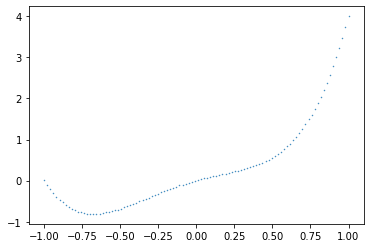

In [26]:
plt.scatter(X,Y,s=0.2)

In [63]:
X=X.to(device).requires_grad_()
Y=Y.to(device).requires_grad_()
X_test=X_test.to(device)
Y_test=Y_test.to(device)

In [70]:
class Net(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Net,self).__init__()
        self.in_dim,self.out_dim = input_dim, output_dim
        self.l1 = nn.Sequential(
            nn.Linear(self.in_dim, 10),
            nn.ReLU())
        self.l2 = nn.Linear(10,5)
        self.l3 = nn.Linear(5,self.out_dim)
    
    def forward(self,X):
        self.X = self.l1(X)
        self.X = self.l2(self.X)
        return self.l3(self.X)

In [71]:
net = Net(X.shape[1],Y.shape[1])
net.to(device)

Net(
  (l1): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
  )
  (l2): Linear(in_features=10, out_features=5, bias=True)
  (l3): Linear(in_features=5, out_features=1, bias=True)
)

In [72]:
optm = torch.optim.SGD(net.parameters(), lr=0.02)
loss = nn.MSELoss()

In [73]:
from tqdm import tqdm

In [74]:
train_loader = torch.utils.data.DataLoader(dataset=X,
                                           batch_size=10)
                                           

In [75]:
loss_list=[]

In [76]:
net.train()
for epoc in tqdm(range(100)):
    res = net(X)
    l = loss(X,Y)
    loss_list.append(l.sum())
    net.zero_grad()
    l.backward()
    optm.step()

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1661.47it/s]


In [84]:
for i in range(100):
    loss_list[i]=loss_list[i].to('cpu').detach().numpy()

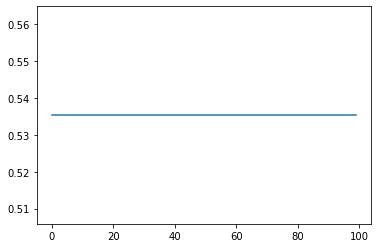

In [85]:
plt.plot(range(100),loss_list)